# Pymaceuticals Inc.
---

### Analysis

The data provide new information on the impact of different drugs on tumors in mice. Some new information included:

1.  Ramicane looks to be the biggest competitor to Capomulin at reducing tumor volume over time.
2.  The box plot shows that of the chosen four drugs (Capomulin, Ramicane, Infubinol, Ceftamin), the mice medicated with Capomulin and Ramicane had the least tumor volume at the point of their final timepoints.
3.  For mice that were given the the Capomulin drug, there was a positive correlation between the weight of the mice and the average observed tumor volume with a correlation coefficient of 0.84.

This information is useful as it will guide future invesment and decision making around the Capomulin tumor medication.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
print(f'Total number of mice is: {total_mice}')

Total number of mice is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice_ID = merged_data_df.loc[duplicate_mice, 'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicate_mice_ID[0]]
duplicate_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop(duplicate_mice_ID_data.index)

In [6]:
# Checking the number of mice in the clean DataFrame.
no_duplicate_analysis = len(analysis_data_df['Mouse ID'].unique())
print(f'Number of mice not duplicated is: {no_duplicate_analysis}')

Number of mice not duplicated is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = analysis_data_df.groupby('Drug Regimen')

mean = summary_statistics['Tumor Volume (mm3)'].mean()
median = summary_statistics['Tumor Volume (mm3)'].median()
var = summary_statistics['Tumor Volume (mm3)'].var()
std = summary_statistics['Tumor Volume (mm3)'].std()
sem = summary_statistics['Tumor Volume (mm3)'].sem()
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard Deviation': std,
    'SEM': sem
})
print('Tumor Volume Summary Statistics')
summary_statistics_df

Tumor Volume Summary Statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = summary_statistics['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_agg.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
print('Advanced Method')
print('Tumor Volume Summary Statistics')
summary_agg_df

Advanced Method
Tumor Volume Summary Statistics


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

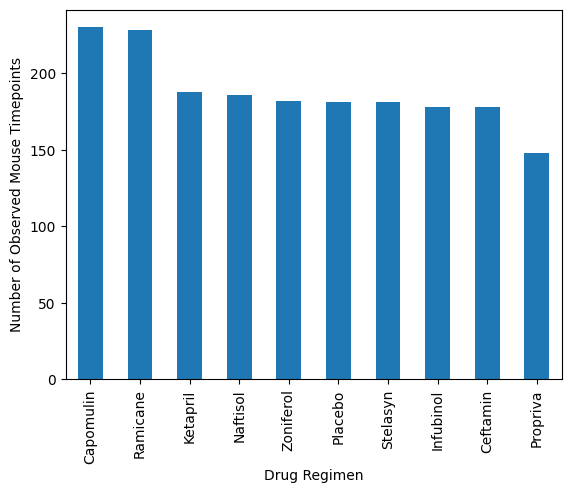

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = analysis_data_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color = 'tab:blue')
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Observed Mouse Timepoints") 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

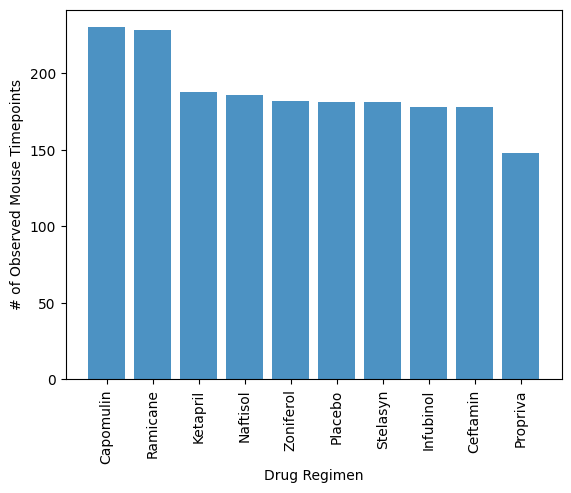

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'tab:blue', alpha = 0.8, align = 'center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

<Axes: ylabel='count'>

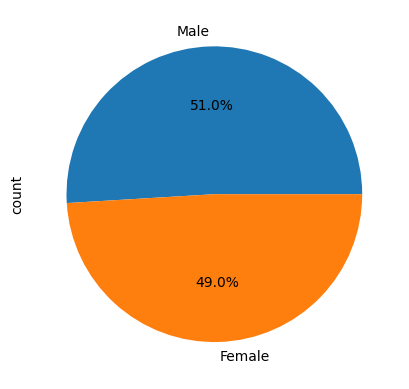

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_by_sex = analysis_data_df["Sex"].value_counts() # Counting the number of each sex in the cleaned data
data_by_sex.plot.pie(autopct = "%1.1f%%") # Plotting as a pie chart with one decimal point in the percentages

Text(0, 0.5, 'Sex')

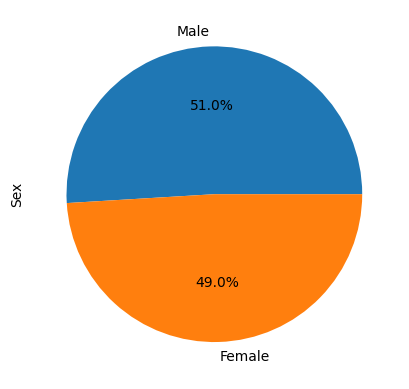

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male'] # Set the labels
sizes = [49.0, 51.0] # Manually setting the sizes of each side of the pie chart
plot = data_by_sex.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
each_mouse = analysis_data_df.groupby(["Mouse ID"]).max()
each_mouse_cleared = each_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = each_mouse_cleared[['Mouse ID', 'Timepoint']].\
    merge(analysis_data_df, on = ['Mouse ID', 'Timepoint'], how = "left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

def get_outliers(regimen):
    regimen_df = merged_df.loc[merged_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_df.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_df.loc[(regimen_df < lower_bound) | (regimen_df > upper_bound)]

    print(f"{regimen}'s potential outliers: {outliers}")
    return regimen_df

capo = get_outliers("Capomulin")
rami = get_outliers("Ramicane")
infu = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Matthew Durney\AppData\Local\Temp\ipykernel_12604\1063486712.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([capo, rami, infu, ceft], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = red_dot)


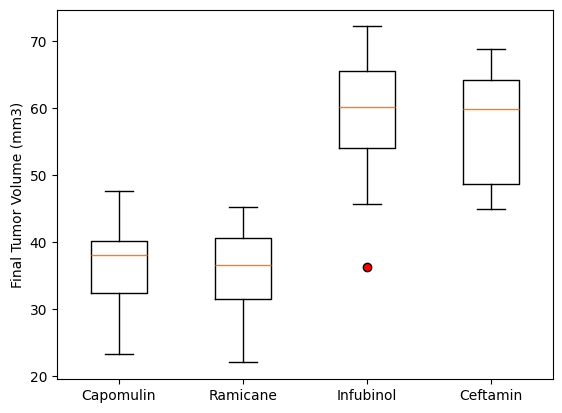

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red")
plt.boxplot([capo, rami, infu, ceft], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

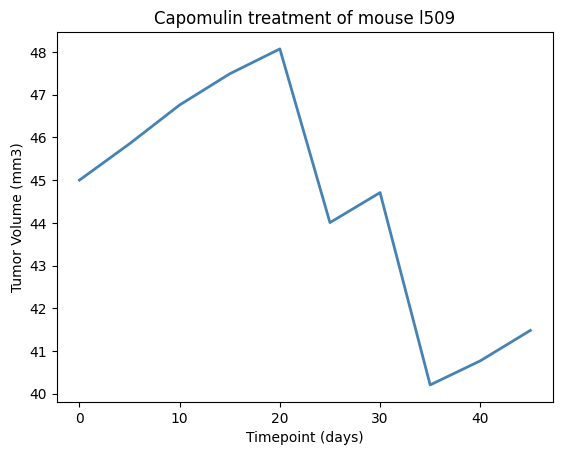

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = analysis_data_df.loc[analysis_data_df["Drug Regimen"] == "Capomulin",:] 
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()

# Format and labels
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumor_size, linewidth = 2, color = "steelblue", label = "Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

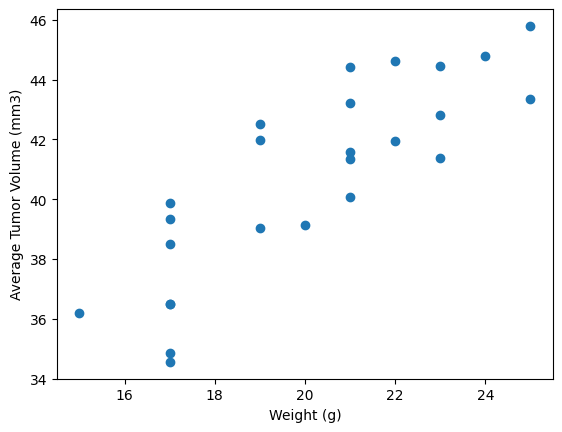

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = analysis_data_df.loc[analysis_data_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

cap_data = cap_df.groupby(["Mouse ID"]).mean()

plt.scatter(cap_data['Weight (g)'], cap_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


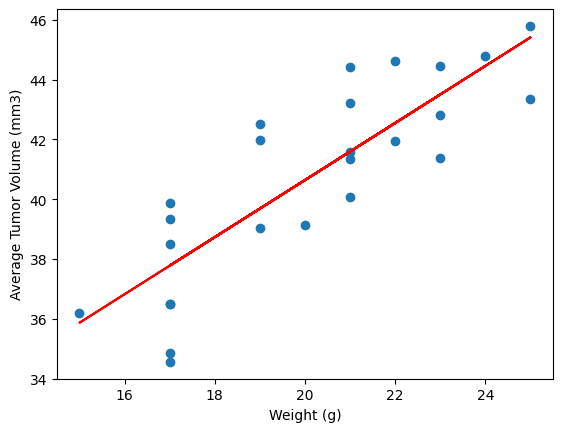

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(cap_data['Weight (g)'], cap_data['Tumor Volume (mm3)'])[0], 2)

print(f"The correlation between mouse weight and the average tumor volume is {corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_data["Weight (g)"], cap_data["Tumor Volume (mm3)"])

regress_values = cap_data["Weight (g)"] * slope + intercept
plt.scatter(cap_data['Weight (g)'], cap_data['Tumor Volume (mm3)'])
plt.plot(cap_data["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()